# Import necessary libraries



In [46]:
import pandas as pd
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer # Lemmatization
from wordcloud import WordCloud, STOPWORDS


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#Load Data

In [26]:
df= pd.read_csv("/content/BA_reviews.csv", index_col=[0])

In [27]:
df.head()

,reviews
0,✅ Trip Verified | Boarding at Mumbai was chaot...
1,"Not Verified | Mexico City Airport is a zoo, b..."
2,"✅ Trip Verified | Very poor service, very fru..."
3,Not Verified | Generally poor. Sent to gate o...
4,Not Verified | BA changed our prepaid seats a...


In [28]:
df.tail()

,reviews
995,✅ Trip Verified | Our original flight was can...
996,✅ Trip Verified | Hong Kong to London. This w...
997,✅ Trip Verified | Washington to Bucharest ret...
998,✅ Trip Verified | London to Warsaw. BA Europe...
999,✅ Trip Verified | London to Istanbul. Due to ...


Remove any unnecessary text from each of the rows. For example, "✅ Trip Verified".

# Data preprocessing 


*   Cleaning the text:
        Remove any unnecessary text,
         all special characters and 
         numericals leaving the alphabets 

*   Tokenization.
          the process of breaking the text into
           smaller pieces called Tokens.


*   Enrichment – POS tagging.
        converting each token into a tuple having the form 
        (word, tag). POS tagging essential to preserve the  
        context of the word and is essential for Lemmatization.
*   Stopwords removal.

          Remove stopword(Stopwords in English are 
          words that carry very little useful information)


*   Lemmatization.

          The process of break a word down to its
           root meaning to identify similarities.  








## Cleaning the text.

In [29]:
# Remove Trip Verified and Not Verfied from the text
df["reviews"] = df["reviews"].str.split("|",expand=True)[1]

In [30]:
df.head()

,reviews
0,Boarding at Mumbai was chaotic and badly orga...
1,"Mexico City Airport is a zoo, but taking the ..."
2,"Very poor service, very frustrating. Firstly..."
3,"Generally poor. Sent to gate on time, sat ma..."
4,BA changed our prepaid seats at the last min...


In [31]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Boarding at Mumbai was chaotic and badly orga...,Boarding at Mumbai was chaotic and badly orga...
1,"Mexico City Airport is a zoo, but taking the ...",Mexico City Airport is a zoo but taking the l...
2,"Very poor service, very frustrating. Firstly...",Very poor service very frustrating Firstly my...
3,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent to gate on time sat maybe...
4,BA changed our prepaid seats at the last min...,BA changed our prepaid seats at the last minu...


## Tokenization ,  Stopwords removal & Enrichment – POS tagging.


In [34]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

,reviews,Cleaned Reviews,POS tagged
0,Boarding at Mumbai was chaotic and badly orga...,Boarding at Mumbai was chaotic and badly orga...,"[(Boarding, v), (Mumbai, n), (chaotic, a), (ba..."
1,"Mexico City Airport is a zoo, but taking the ...",Mexico City Airport is a zoo but taking the l...,"[(Mexico, n), (City, n), (Airport, n), (zoo, n..."
2,"Very poor service, very frustrating. Firstly...",Very poor service very frustrating Firstly my...,"[(poor, a), (service, n), (frustrating, a), (F..."
3,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent to gate on time sat maybe...,"[(Generally, r), (poor, a), (Sent, n), (gate, ..."
4,BA changed our prepaid seats at the last min...,BA changed our prepaid seats at the last minu...,"[(BA, n), (changed, v), (prepaid, n), (seats, ..."


##Lemmatization.

In [36]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Boarding at Mumbai was chaotic and badly orga...,Boarding at Mumbai was chaotic and badly orga...,"[(Boarding, v), (Mumbai, n), (chaotic, a), (ba...",Boarding Mumbai chaotic badly organise board...
1,"Mexico City Airport is a zoo, but taking the ...",Mexico City Airport is a zoo but taking the l...,"[(Mexico, n), (City, n), (Airport, n), (zoo, n...",Mexico City Airport zoo take late departure ...
2,"Very poor service, very frustrating. Firstly...",Very poor service very frustrating Firstly my...,"[(poor, a), (service, n), (frustrating, a), (F...",poor service frustrating Firstly flight LHR ...
3,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent to gate on time sat maybe...,"[(Generally, r), (poor, a), (Sent, n), (gate, ...",Generally poor Sent gate time sat maybe minu...
4,BA changed our prepaid seats at the last min...,BA changed our prepaid seats at the last minu...,"[(BA, n), (changed, v), (prepaid, n), (seats, ...",BA change prepaid seat last minute charge us...


In [39]:
df[['reviews','Lemma']].head(7)

,reviews,Lemma
0,Boarding at Mumbai was chaotic and badly orga...,Boarding Mumbai chaotic badly organise board...
1,"Mexico City Airport is a zoo, but taking the ...",Mexico City Airport zoo take late departure ...
2,"Very poor service, very frustrating. Firstly...",poor service frustrating Firstly flight LHR ...
3,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent gate time sat maybe minu...
4,BA changed our prepaid seats at the last min...,BA change prepaid seat last minute charge us...
5,Flew from London Heathrow to Marrakech. BA c...,Flew London Heathrow Marrakech BA change pre...
6,I was meant to fly in January to Algeria. I p...,mean fly January Algeria pay ticket day mean...


#Sentiment Analysis using VADER
The data isn't labelled so I will use VADER to provide sentiment scores based on the words used.

In [41]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Boarding at Mumbai was chaotic and badly orga...,Boarding at Mumbai was chaotic and badly orga...,"[(Boarding, v), (Mumbai, n), (chaotic, a), (ba...",Boarding Mumbai chaotic badly organise board...,0.9871,Positive
1,"Mexico City Airport is a zoo, but taking the ...",Mexico City Airport is a zoo but taking the l...,"[(Mexico, n), (City, n), (Airport, n), (zoo, n...",Mexico City Airport zoo take late departure ...,0.9920,Positive
2,"Very poor service, very frustrating. Firstly...",Very poor service very frustrating Firstly my...,"[(poor, a), (service, n), (frustrating, a), (F...",poor service frustrating Firstly flight LHR ...,-0.9403,Negative
3,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent to gate on time sat maybe...,"[(Generally, r), (poor, a), (Sent, n), (gate, ...",Generally poor Sent gate time sat maybe minu...,-0.4588,Negative
4,BA changed our prepaid seats at the last min...,BA changed our prepaid seats at the last minu...,"[(BA, n), (changed, v), (prepaid, n), (seats, ...",BA change prepaid seat last minute charge us...,0.6908,Positive


In [42]:
sentiment_counts = df['Analysis'].value_counts()
sentiment_counts

Positive    528
Negative    367
Neutral     105
Name: Analysis, dtype: int64

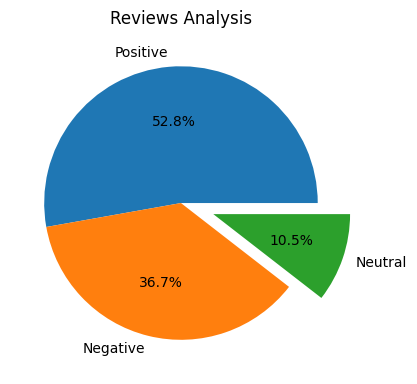

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(sentiment_counts.values, labels = sentiment_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False);

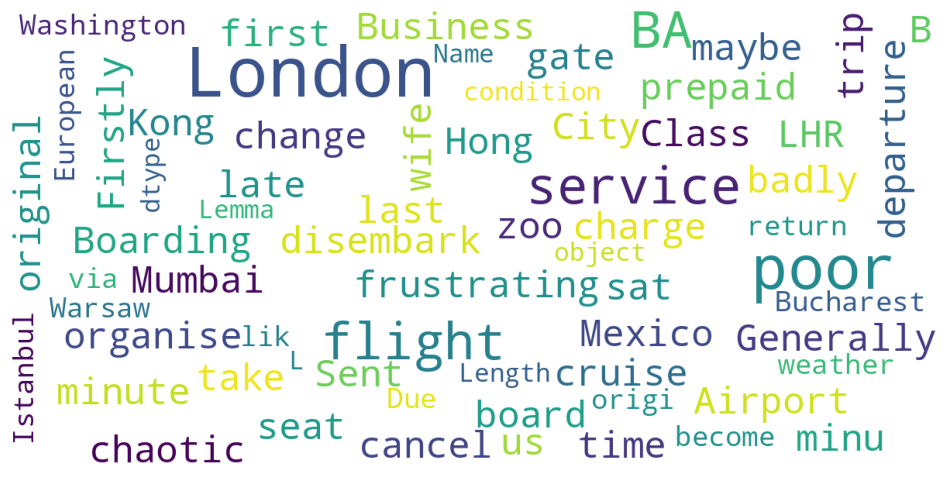

In [45]:
stopwords = set(STOPWORDS)
#Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

In [47]:
df.to_csv("BA_cleaned_reviews.csv")




Therefore, using the VADER module, I concluded that the data has 528 positive reviews, 367 negative reviews, and 105 neutral reviews.